In [4]:
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']


data = pd.read_csv('E:/databag/bag2/AgglomerativeClustering聚类(2到7)结果(log(sqrt+e)非线性变化).csv',index_col=0)

data1=data.drop('4个簇',axis=1)
data1
data2=data1.drop('5个簇',axis=1)
data3=data2.drop('6个簇',axis=1)
data4=data3.drop('7个簇',axis=1)
data5=data4.drop('3个簇',axis=1)
data6=data5.drop('2个簇',axis=1)
data6

,性别,肺活量,身高(cm),体重(kg),谷丙转氨酶(ALT)(U/L),总胆红素(TBIL)(umol/L),平均血小板体积(MPV)(fl),白细胞计数(WBC)(10^9/L),中性粒细胞绝对值(NE#)(10^9/L),中性粒细胞比值(NE%)(%),...,平均红细胞血红蛋白浓度(MCHC)(g/L),红细胞分布宽度变异系数(RDW_CV)(%),血小板计数(PLT)(10^9/L),血小板分布宽度(PDW)(%),大血小板比率(P-LCR)(%),中间细胞百分比(MID%)(%),中间细胞绝对值(MID#)(10^9/L),红细胞分布宽度(RDW-SD)(%),血压-高(mmHg),血压-低(mmHg)
0,1.000000,1.238270,1.289110,1.181460,1.090723,1.091032,1.070995,1.137050,1.132174,1.225226,...,1.291650,1.157256,1.160168,1.162582,1.094403,1.163828,1.112753,1.168848,1.255010,1.188152
1,1.000000,1.208079,1.295619,1.175549,1.093909,1.037245,1.254385,1.158306,1.138849,1.208056,...,1.271268,1.144496,1.164513,1.136306,1.188542,1.229698,1.172876,1.222129,1.255010,1.220565
2,1.000000,1.238270,1.289110,1.196131,1.051564,1.034311,1.231215,1.137050,1.121327,1.204306,...,1.266145,1.133201,1.166632,1.192598,1.198436,1.215941,1.155973,1.261617,1.269992,1.216858
3,1.000000,1.196618,1.294817,1.188979,1.078791,1.045428,1.281339,1.121438,1.104778,1.196079,...,1.199140,1.120618,1.168718,1.077891,1.309406,1.202119,1.136435,1.214973,1.247038,1.216858
4,1.000000,1.233599,1.295619,1.192598,1.085043,1.086669,1.204390,1.160723,1.167568,1.264522,...,1.223971,1.113701,1.165046,1.240352,1.230812,1.213831,1.172876,1.268339,1.258323,1.168848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,1.313262,1.202454,1.295619,1.207891,1.048522,1.066020,1.231215,1.217184,1.234566,1.301522,...,1.282320,1.173215,1.160168,1.216175,1.231502,1.154021,1.136435,1.244002,1.274063,1.262651
4047,1.000000,1.155552,1.288281,1.209501,1.040397,1.041488,1.183567,1.052821,1.090027,1.233189,...,1.282320,1.209180,1.168718,1.200358,1.189142,1.193450,1.081024,1.227488,1.241120,1.276565
4048,1.000000,1.218765,1.289110,1.206265,1.071927,1.041800,1.145033,1.237097,1.220745,1.251314,...,1.254081,1.271907,1.225095,1.200358,1.156375,1.227654,1.236563,1.278853,1.255010,1.244458
4049,1.000000,1.147280,1.285774,1.175549,1.055396,1.067298,1.177865,1.165427,1.164972,1.249034,...,1.277485,1.215783,1.163977,1.195750,1.178253,1.197350,1.155973,1.286109,1.217965,1.168848


In [5]:

# 轮廓系数
silhouettes = []
#Calinski-Harabaz Index
scores = []
#Davies-Bouldin Index
davies_list = []
# 循环设置不同的聚类簇数
for i in range(4, 10):
    y_pre = np.array(data.iloc[:,23+i])
    # 轮廓系数
    silhouette = metrics.silhouette_score(data4, y_pre, metric='euclidean')
    silhouettes.append(silhouette)
    #Davies-Bouldin Index
    davies_list.append(davies_bouldin_score(data4,y_pre))
    #Calinski-Harabaz Index
    score = calinski_harabasz_score(data4,y_pre)
    scores.append(score)

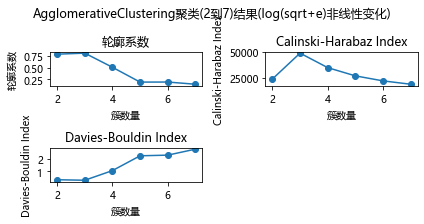

In [6]:

# 绘制轮廓系数曲线
plt.subplot(321)
plt.title('轮廓系数')
plt.plot(range(2, 8), silhouettes, marker='o')
plt.xlabel('簇数量')
plt.ylabel('轮廓系数')
# 绘制Calinski-Harabaz Index曲线
plt.subplot(322)
plt.title('Calinski-Harabaz Index')
plt.plot(range(2, 8),scores , marker='o')
plt.xlabel('簇数量')
plt.ylabel('Calinski-Harabaz Index')

# 绘制Davies-Bouldin Index曲线
plt.subplot(323)
plt.title('Davies-Bouldin Index')
plt.plot(range(2, 8),davies_list, marker='o')
plt.xlabel('簇数量')
plt.ylabel('Davies-Bouldin Index')

plt.suptitle('AgglomerativeClustering聚类(2到7)结果(log(sqrt+e)非线性变化)')
plt.tight_layout()
plt.show()